# Analisis de Datos del Grupo A
### **Universidad de Flores y Universidad de Villa María**

En esta notebook se abordara el análisis de los datos extraídos durante el proceso de ETL, con el objetivo de proporcionar un marco para que el **Consejo Nacional de Calidad de la Educación** pueda crear una estrategía de estimulación de carreras, utilizando como base análisis de las diferentes poblaciones de estudiantes.

**Los objetivos de este análisis son:**
  - Realizar un análisis exploratorio de las universidades de este grupo
  - Realizar una análisis descriptivo
  - Obtener datos relevantes, comunmente conocidos como insights
  - Concluir los aspectos más importates del dataset

# Configuraciones

En esta sección configuramos todo lo necesario para el análisis, desde las librerías utilizadas hasta los colores elegidos para realizar los gráficos y las propiedades escenciales de cada uno, para así mantener una consistencia.

In [67]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

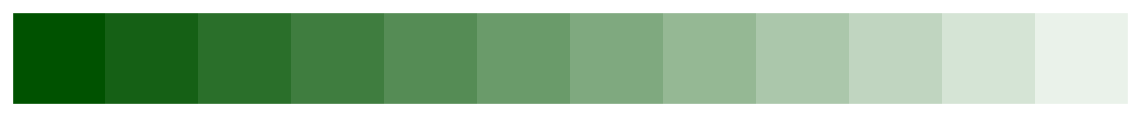

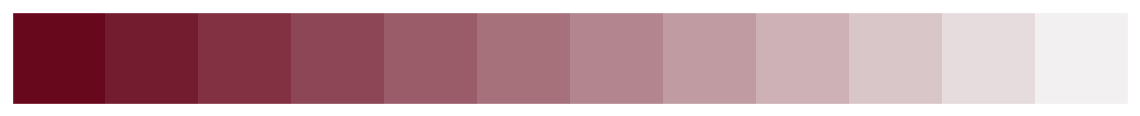

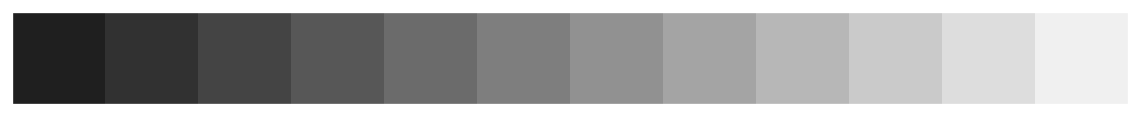

In [68]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['legend.frameon'] = False

sns.set_style('dark')
colors_green = sns.light_palette("#005200", input='rgb',n_colors=12)[::-1]
colors_red = sns.light_palette("#68081C", input='rgb',n_colors=12)[::-1]
colors_dark = sns.light_palette("#1F1F1F", input='rgb',n_colors=12)[::-1]

sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

# Importaciones de los datos

En esta sección **importamos los datasets transformados** y además datos externos de la base de datos geonames para extraer las provincias de los alumnos, con el fin de realizar un análisis más profundo respecto a la **variable geográfica**.

In [69]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoA_flores_universidad'
university1_name = 'Universidad de Flores'

university2 = 'GrupoA_villa_maria_universidad'
university2_name = 'Universidad de Villa María'

df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep='\t')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep='\t')
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None)


In [70]:
# Fix preventivo de columna extra
df_1.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')

df_2.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')

# Primer acercamiento, correcciones y transformaciones adicionales

En esta sección vemos los aspectos fundamentales de los datos a trabajar, hacemos algunas correcciones y expandimos los datos

In [71]:
#imprimimos las columnas
df_1.columns 

Index(['university', 'career', 'inscription_date', 'first_name', 'last_name',
       'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [72]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1733 non-null   object
 1   career            1733 non-null   object
 2   inscription_date  1733 non-null   object
 3   first_name        1733 non-null   object
 4   last_name         1733 non-null   object
 5   gender            1733 non-null   object
 6   age               1733 non-null   int64 
 7   postal_code       1733 non-null   int64 
 8   location          1733 non-null   object
 9   email             1733 non-null   object
dtypes: int64(2), object(8)
memory usage: 135.5+ KB


In [73]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        595 non-null    object
 1   career            595 non-null    object
 2   inscription_date  595 non-null    object
 3   first_name        595 non-null    object
 4   last_name         595 non-null    object
 5   gender            595 non-null    object
 6   age               595 non-null    int64 
 7   postal_code       595 non-null    int64 
 8   location          595 non-null    object
 9   email             595 non-null    object
dtypes: int64(2), object(8)
memory usage: 46.6+ KB


In [74]:
print(f'La cantida de carreras en la {university1_name} es de:',len(df_1.career.unique()))
print(f'La cantida de carreras en la {university2_name} es de:',len(df_1.career.unique()))

La cantida de carreras en la Universidad de Flores es de: 33
La cantida de carreras en la Universidad de Villa María es de: 33


In [75]:
df_1.describe()

,age,postal_code
count,1733.000000,1733.000000
mean,35.825159,4890.144259
std,19.093819,2220.970797
min,19.000000,1601.000000
25%,21.000000,3027.000000
50%,22.000000,4728.000000
75%,51.000000,6537.000000
max,79.000000,9421.000000


In [76]:
df_2.describe()

,age,postal_code
count,595.000000,595.000000
mean,24.759664,4734.013445
std,7.904803,2076.609956
min,19.000000,1602.000000
25%,21.000000,2848.000000
50%,21.000000,4655.000000
75%,21.000000,6420.000000
max,50.000000,9225.000000


Las únicas variables númericas dentro del dataset es la edad y el código postal, aunque este último más bien debería considerarse como categórica. Por lo tanto gráficamos como se vería la distribución de los valores de edad.

Como vemos que las edades tienen valores que no son coherentes, como serían alumnos menores de 15 años y mayores de 85, siendo que la edad de ingreso a la universidad usualmente es de 17-18 años y siendo que la esperanza de vida de argentina es hasta los 72 años aproximadamente (1).

(1) https://datosmacro.expansion.com/demografia/esperanza-vida/argentina#:~:text=En%202020%20la%20esperanza%20de,fue%20de%2073%2C41%20a%C3%B1os.

In [77]:
df_1 = df_1[df_1.age.between(15,85)]
df_2 = df_2[df_2.age.between(15,85)]

Text(0, 0.5, 'Carrera')

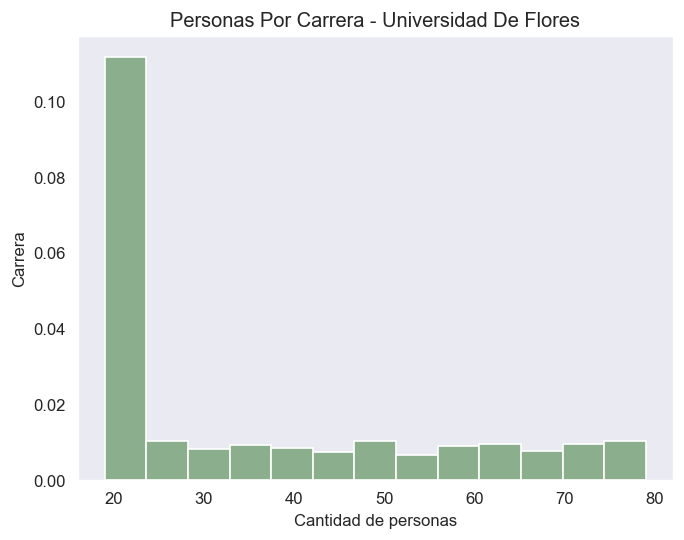

In [78]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

Text(0, 0.5, 'Cantidad')

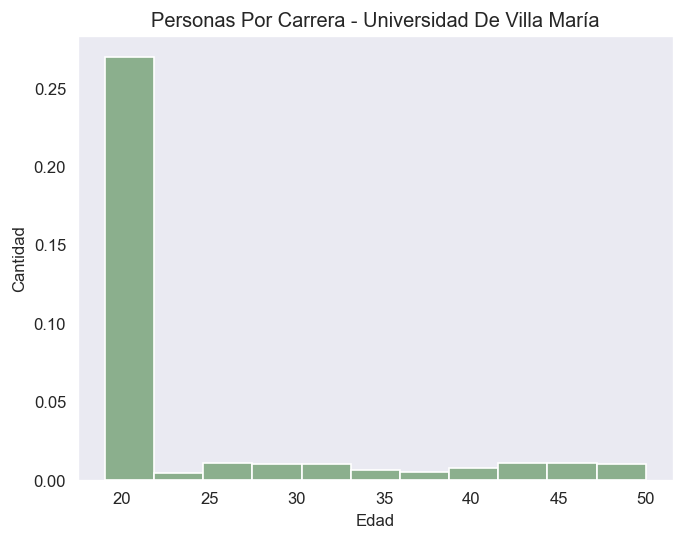

In [79]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Ambas universidades cuentan con una cantidad enorme de alumnos en el rango de los 20 años, con muy pocos alumnos en el resto del rango de edades

Las variables de este dataset extraido corresponde a las siguientes columnas:

- **'university'**: esta variable menciona la universidad en la que asiste el alumno
- **'career'**: carrera de la que es alumno
- **'inscription_date'**: fecha en la que se inscribio, 
- **'first_name'**: nombres
- **'last_name'**: apellido/s
- **'gender'**: género declarado
- **'age'**: edad en años
- **'postal_code'**: código postal
- **'location'**: localidad
- **'email'**: mail de contacto

In [80]:
df_geonames.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,AR,3636,"POZO CERCADO (EL CHORRO (F), DPTO. RIVADAVIA (S))",Salta,A,NaN,NaN,NaN,NaN,-23.4933,-61.9267,3
1,AR,4123,LAS SALADAS,Salta,A,NaN,NaN,NaN,NaN,-25.7833,-64.5000,4


Este dataset externo trae datos para enriquecer el dataset original y aporta variables imporantes como la **region**, que en este caso hace referencia a la provincia.

In [81]:
df_geonames.dropna(axis=1, inplace=True)

Realizamos la combinacion de los datasets

In [82]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [83]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

asdasdas

In [84]:
df_1geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,6200,REALICO,La Pampa,L,-35.0333,-64.25,4.0,universidad de flores,licenciatura en kinesiología y fisiatría,2020-11-01,chelsea,taylor,female,21,REALICO,michael67@gmail.com
1,AR,1633,EMPALME,Buenos Aires,B,-34.4333,-59.00,4.0,universidad de flores,ingeniería en informática,2020-12-09,daniel,brown,male,21,EMPALME,khodges@gmail.com


In [85]:
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')
df_2geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,3308,SOL DE MAYO,Misiones,N,-27.5167,-55.725,3.0,universidad nacional de villa maría,licenciatura en sociología,26-Dec-20,roger,gregory,male,35,CANDELARIA,juanmay@hotmail.com
1,AR,3308,COLONIA PROFUNDIDAD,Misiones,N,-27.5167,-55.725,3.0,universidad nacional de villa maría,licenciatura en sociología,26-Dec-20,roger,gregory,male,35,CANDELARIA,juanmay@hotmail.com


Podemos observar nuestro dataset expandido con los nuevos datos geográficos.

# Análisis exploratorío

Un primer paso para describir nuestro dataset es ver las carreras cursadas dentro de las universidades estudiadas

### Curriculas

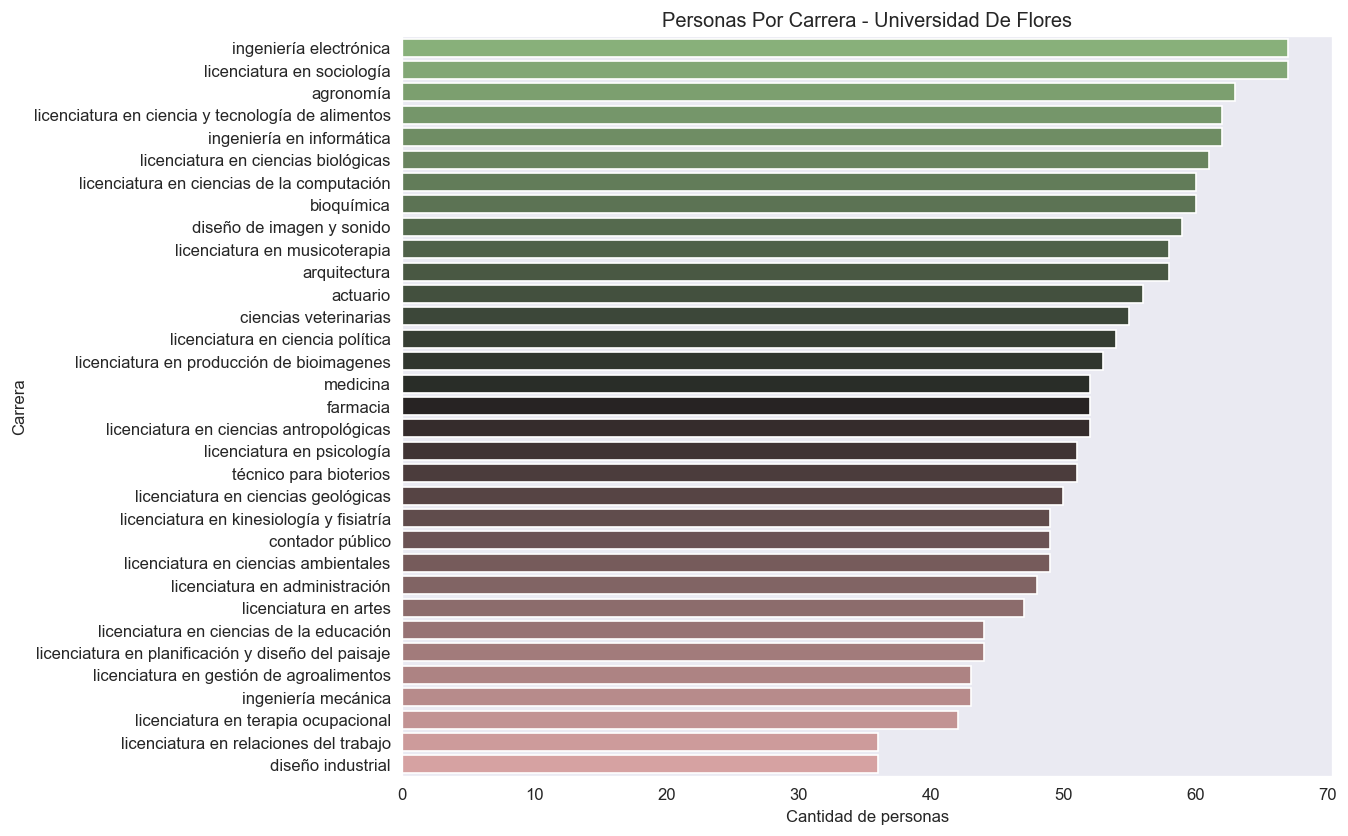

In [86]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

En principio podémos observar que hay una diferencia entre la cantidad de personas que componen el alumnado, al observar el total de alumnos de cada carrera.

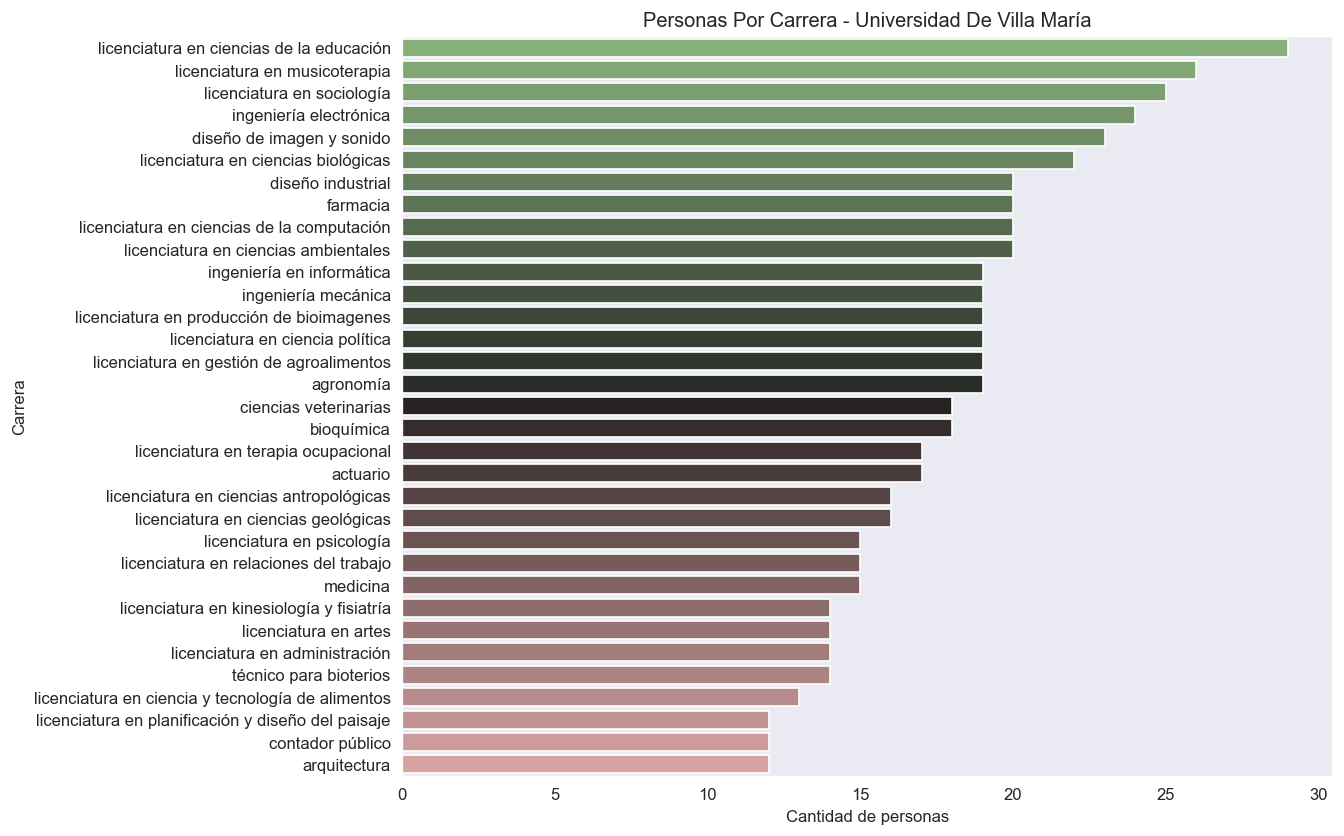

In [87]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

Esto es algo que se repite en esta universidad, pero la cantidad de alumnos por carrera es más grande y la diferencia parece ser más atenuada entre la carrera más concurrida con la menor concurrida.

## Detalle de la variable carrera

Para evaluar más en detalle la composición de alumnos para las diferentes carreras se propone observar las diez carreras con más alumnos de cada universidad y las 10 carreras con menos alumnos de cada universidad, para además comparar con la media de alumnos de toda la oferta académica.



### Universidad De Flores

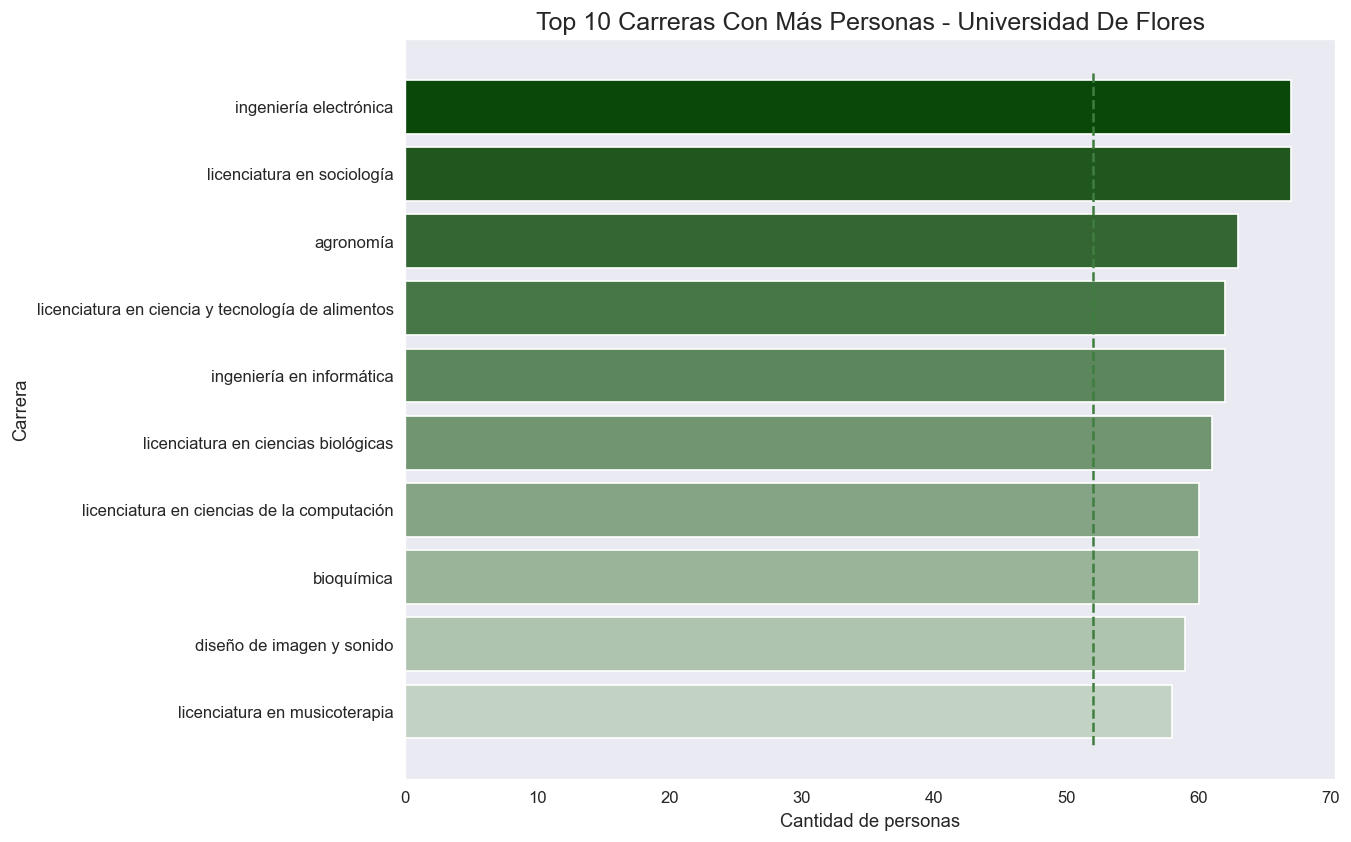

In [88]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

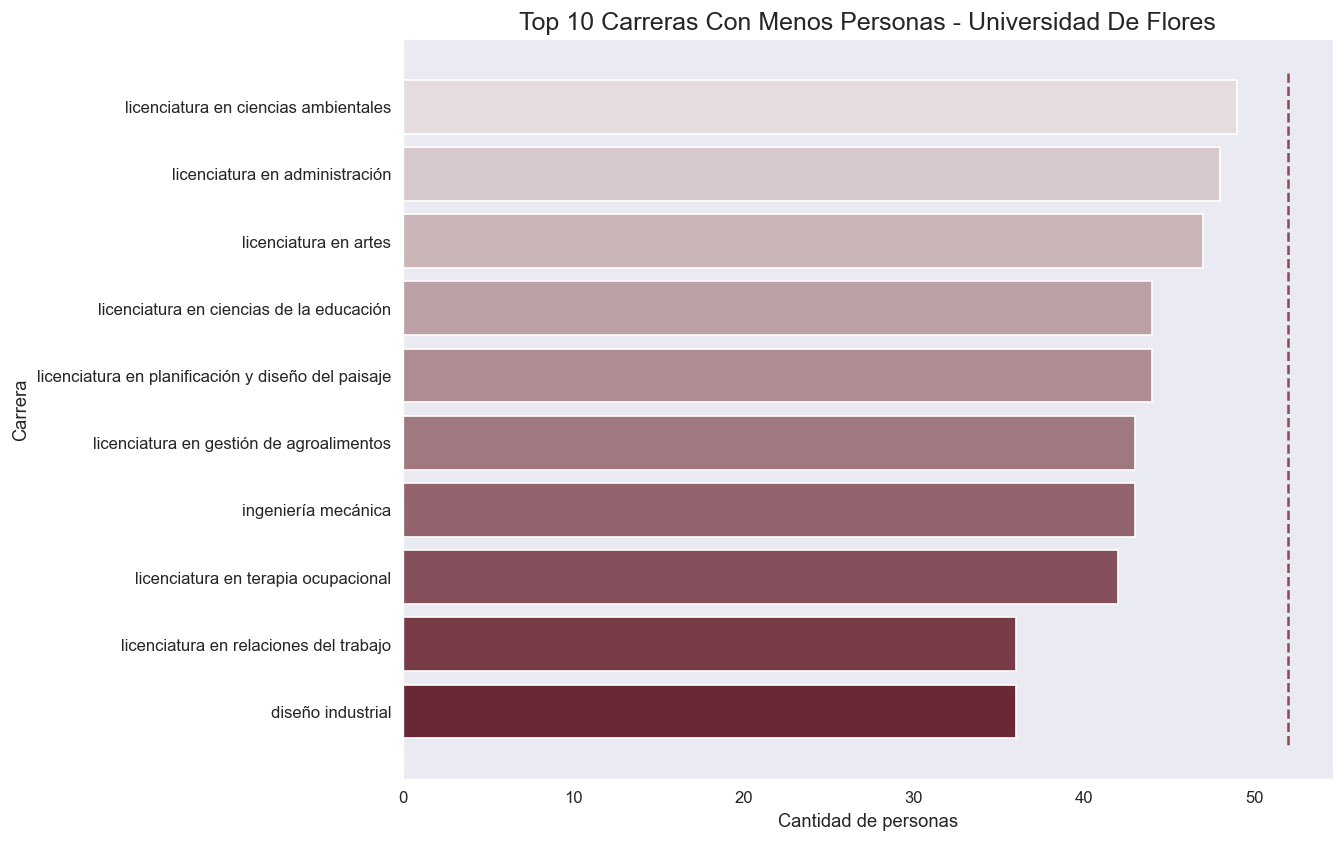

In [89]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Como se puede observar en este gráfico, estás 10 carreras son las que menor cantidad de alumnos presenta y que se encuentran alejados de la media de todas las carreras, vista como una línea punteada en el gráfico.

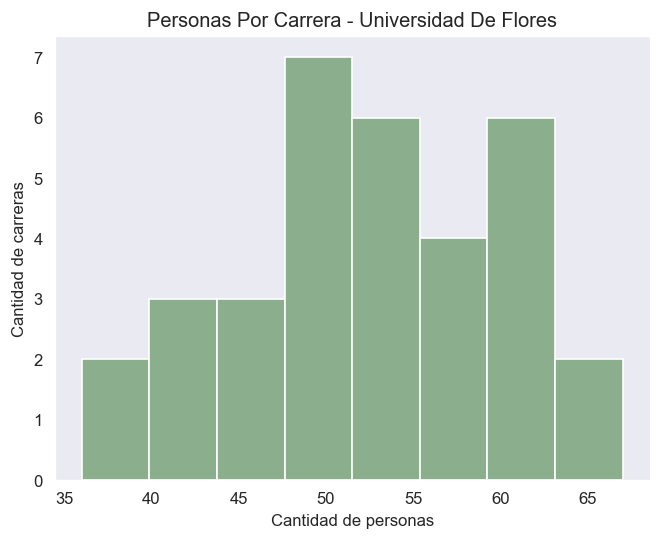

In [90]:
sns.histplot(df_1.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

plt.show()

In [91]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_1.career.value_counts().describe()

count    33.000000
mean     52.515152
std       8.097535
min      36.000000
25%      48.000000
50%      52.000000
75%      59.000000
max      67.000000
Name: career, dtype: float64

Como podémos observar la distribución de alumnos por carrera tiene una media de 52 alumnos y parece estar sesgada hacía la derecha, en este caso la mayoría de las carreras tienen al menos 48 alumnos.

### Universidad De Villa María

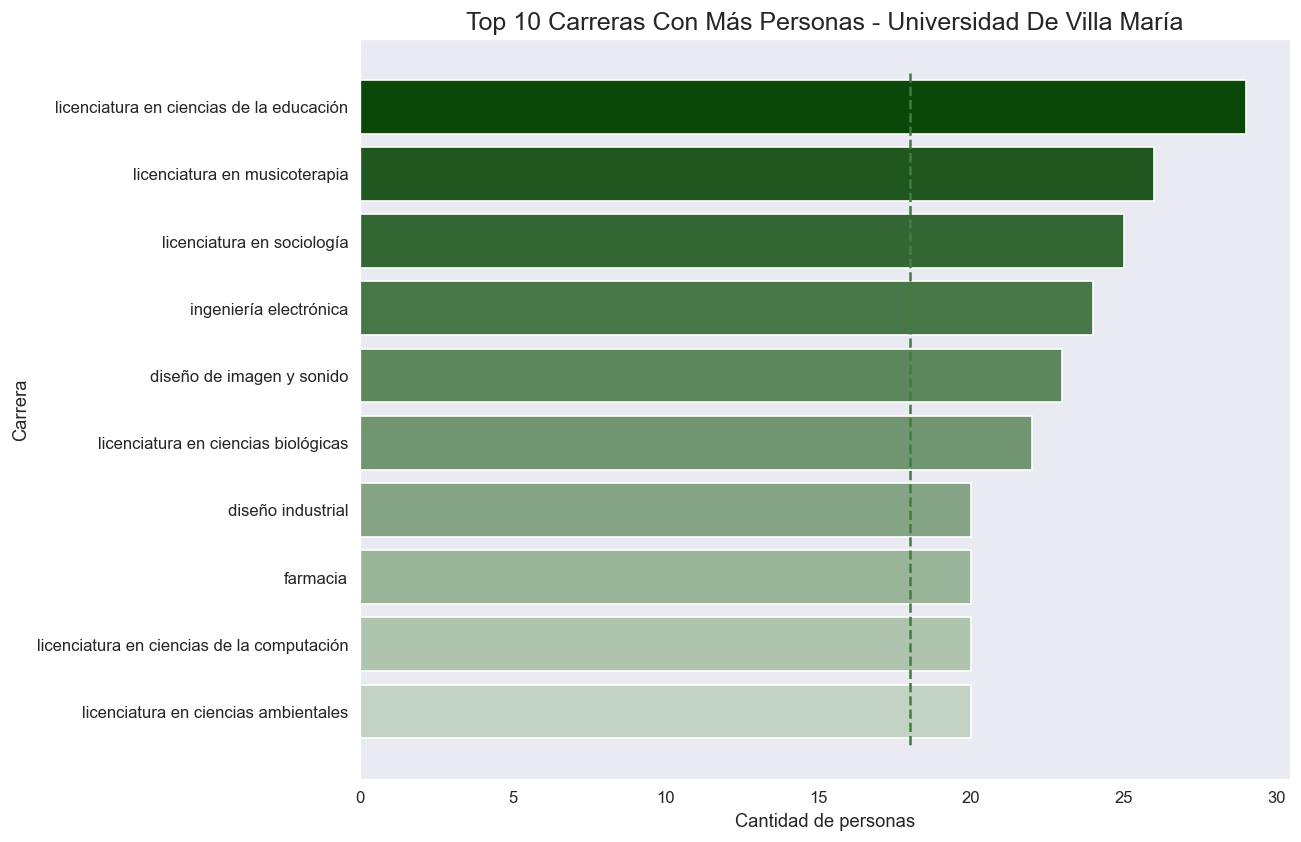

In [92]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

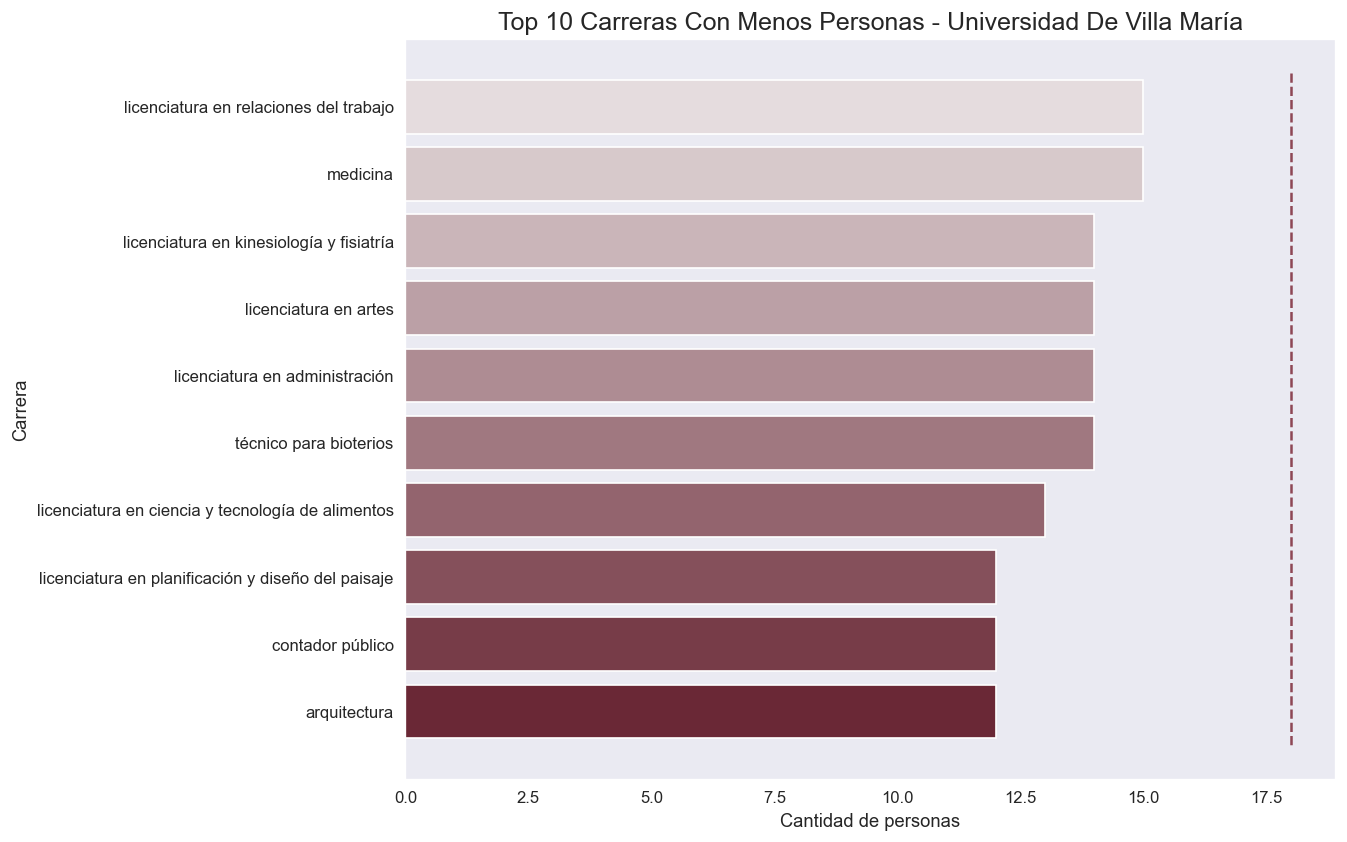

In [93]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

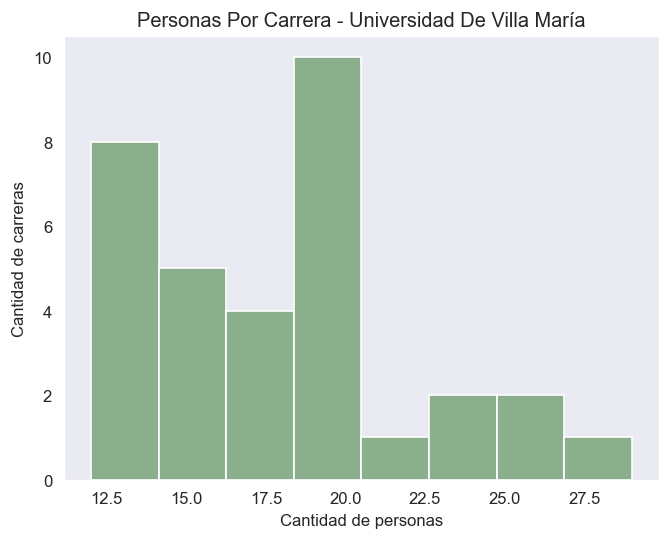

In [94]:
sns.histplot(df_2.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')
plt.show()

In [95]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_2.career.value_counts().describe()

count    33.000000
mean     18.030303
std       4.209252
min      12.000000
25%      15.000000
50%      18.000000
75%      20.000000
max      29.000000
Name: career, dtype: float64

En este caso la media es de 18 alumnos por carrera, presentando un minímo de 12, pero la mayoría de las carreras tienen al menos 15 alumnos en esta universidad.

### Análisis por género y edad - Universidad de Flores

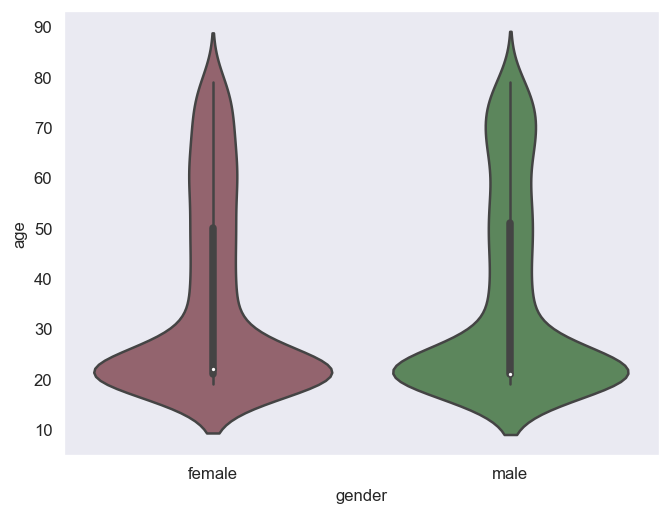

In [96]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

Si observamos la distribución de la edad utilizando los diagrámas de violín categorízado por el género vemos que ambos poseen una distribución casi identica, remarcando que la mayor cantidad de alumnos de ambos generos esta en el rango etario de entre 20 y 30 años.

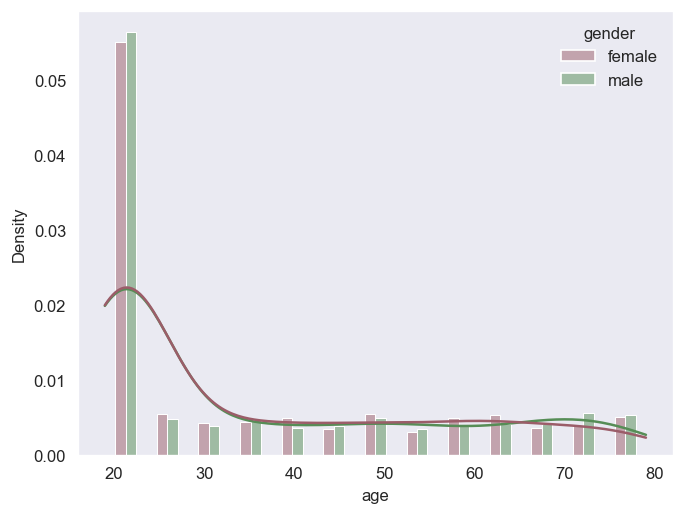

In [97]:
fig, ax = plt.subplots()
sns.histplot(data=df_1,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

Otra forma de visualizar esto es a través de un gráfico de tipo histograma categorizado y sus respectivas curvas de densidad aproximada. En este caso podemos ver un notable pico de alumnos jovenes de 20 años de edad.

### Provincias - Universidad de Flores

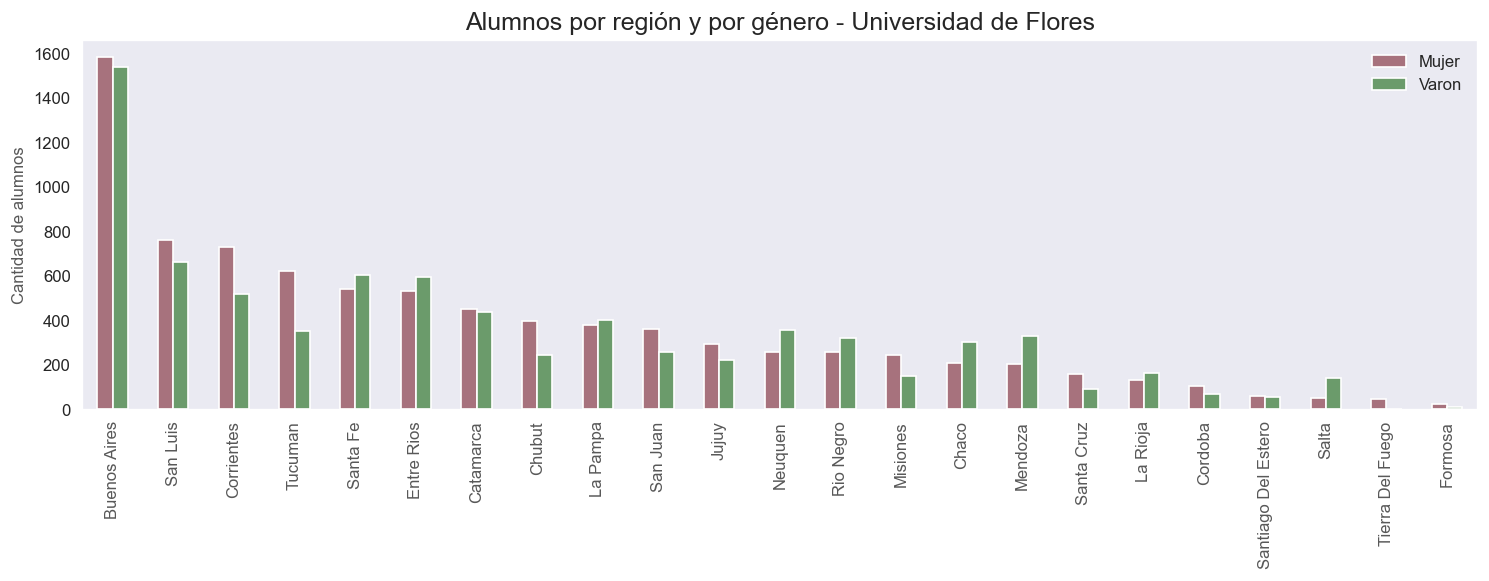

In [98]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
plt.show()

En este gráfico de barras apareadas y ordenadas de forma descendente por género. Respecto a la distribución de alumnos por provincia podemos observar que la gran mayoría de los alumnos provienen de la Provincia de Buenos Aires y es destacable la diferencia entre géneros

Text(0.5, 0, '')

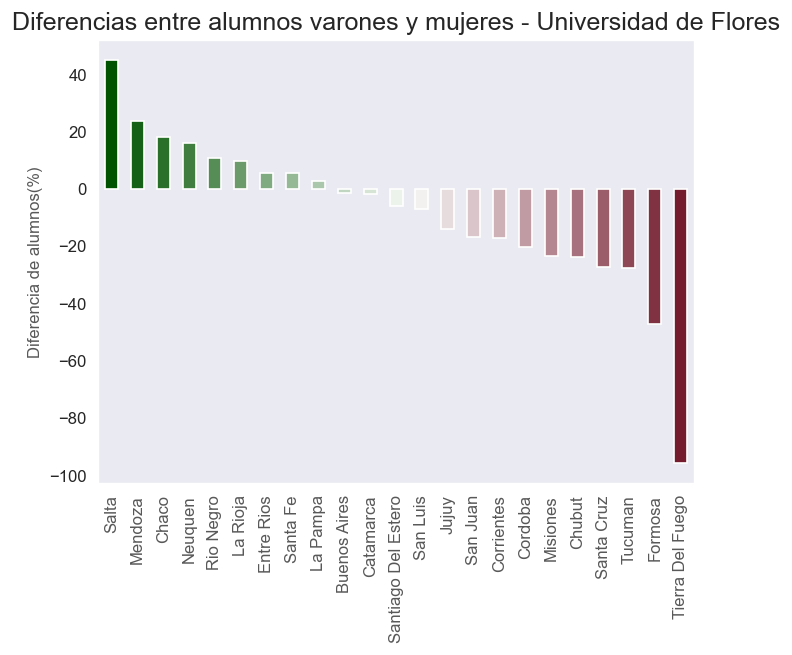

In [99]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres - {university1_name}',{'fontsize':15})
ax.set_ylabel('Diferencia de alumnos(%)',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

Con este gráfico podemos resumir como se ve la diferencia de alumnos para cada provincia en particular de forma porcentual. Salta es la que presenta mayor disparidad respecto a varones junto con Mendoza y Chaco. Respecto a disparidad de mujeres Tierra del Fuego, Formosa y Tucuman son las que presentan mayor disparidad de alumnas provenientes de esas provincias.

### Localidades  - Universidad de Flores

In [118]:
df_1.location.value_counts().head(20)

ALBARRACIN            7
COLONIA HANSEN        5
AVELLANEDA            5
EL SOCORRO            5
CAMPO GARAY           5
COLONIA JAUREGUI      5
ALTO BLANCO           5
ARMSTRONG             5
ARROYO QUILLA         5
BAHIA BUSTAMANTE      5
EMILIO LAMARCA        5
LOS SEMBRADOS         5
ANGELITA              4
ALDEA APELEG          4
CAPIOVI               4
ALTO DE LAS PLUMAS    4
ALTO DEL PUESTO       4
BARCALA               4
ISLA VICTORIA         4
ADOLFO ALSINA         4
Name: location, dtype: int64

<AxesSubplot: ylabel='Frequency'>

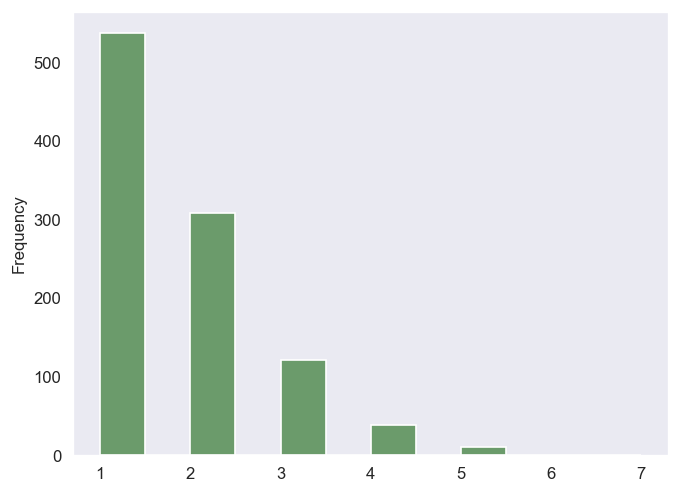

In [101]:
df_1.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])

Al parecer solo la localidad de **Albarracin** destaca por su aporte de alumnos con 7 alumnos de esa localidad, siendo que la mayoría aporta entre 5 y 4 alumnos cada una.

### Análisis por género y edad - Universidad de Villa María

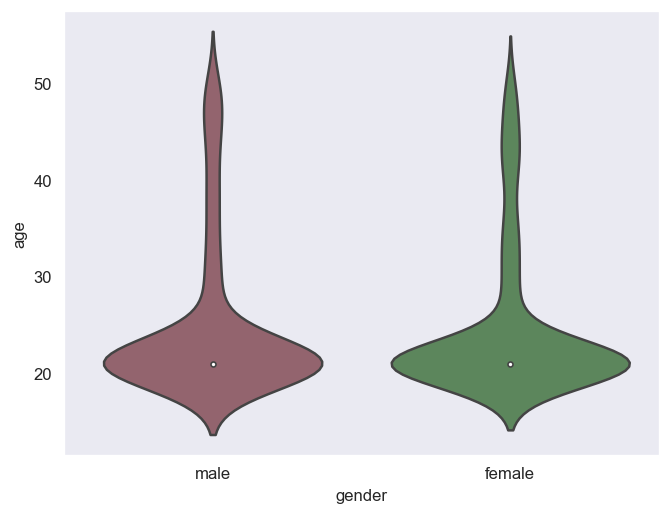

In [102]:
sns.violinplot(data=df_2,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

Al igual que en la anterior universidad, ambos generos tienen graficos de violín practicamente iguales, en estos destaca que la mayor cantidad de alumnos tanto hombres como mujeres tienen en promedio 20 años de edad.

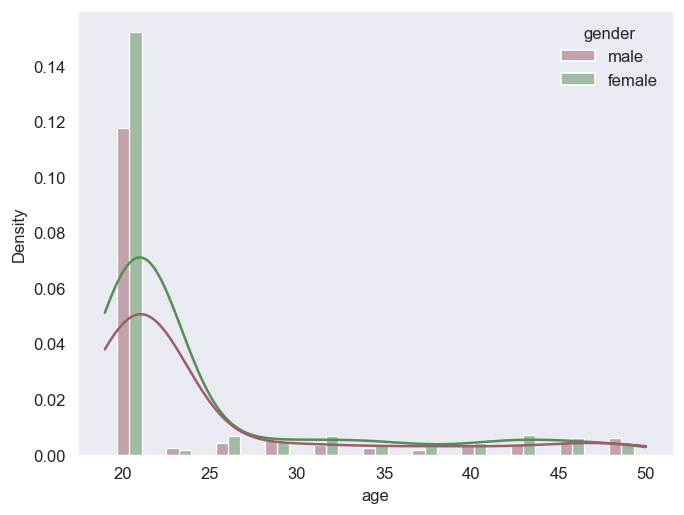

In [103]:
fig, ax = plt.subplots()
sns.histplot(data=df_2,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

La distribución por edades parece tener un gran pico en 20 años y una proporción muy baja y dispersa de las demás edades.

### Provincias - Universidad de Villa María

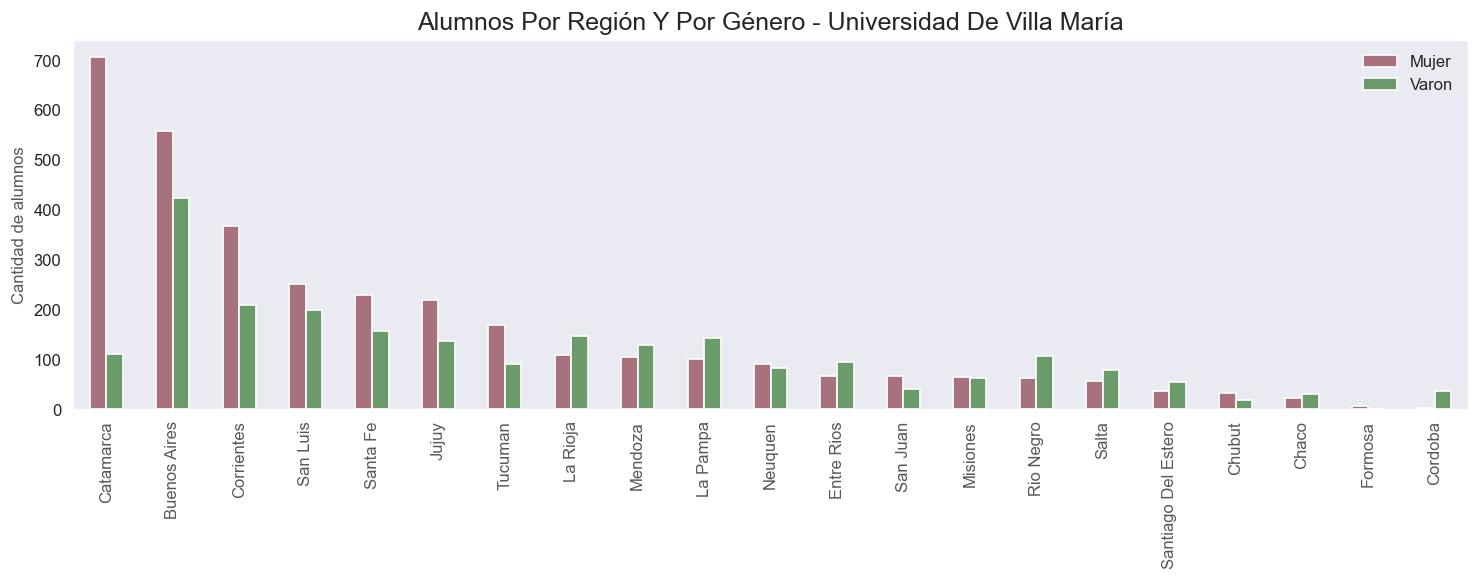

In [119]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_2geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'},
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university2_name}'.title(),{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
plt.show()

Catamarca es la provincia que más mujeres aporta a carreras de esta universidad seguida de Buenos Aires que suele ser la que mas aporta en general a todas las universidades de Argentina.

Text(0.5, 0, '')

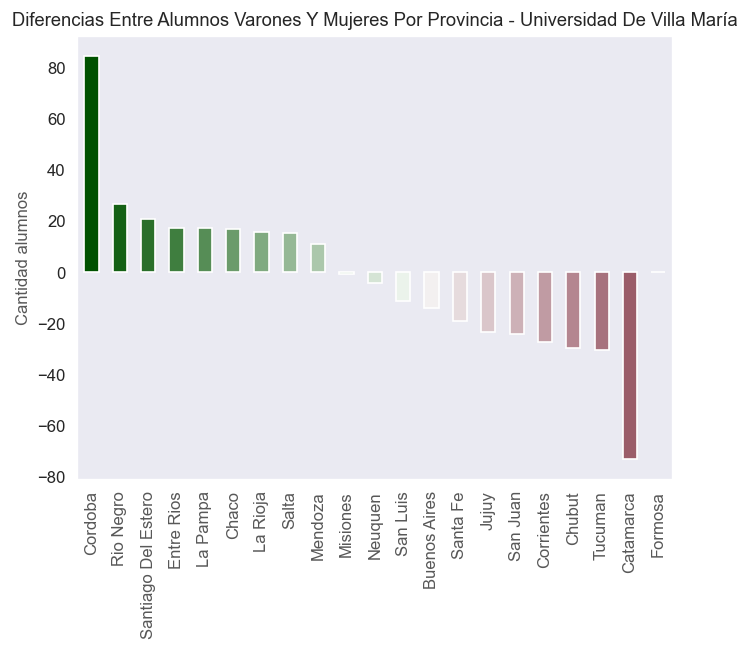

In [120]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres por provincia - {university2_name}'.title(),{'fontsize':11})
ax.set_ylabel('Cantidad alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

Con este gráfico podemos resumir como se ve la diferencia de alumnos para cada provincia en particular de forma porcentual. Cordoba es la que presenta mayor disparidad respecto a varones junto con Rio Negro y Santiago Del Estero. Respecto a disparidad de mujeres Catamarca, Tucuman y Chubut son las que presentan mayor disparidad de alumnas provenientes de esas provincias.

### Localidades - Universidad de Villa Maria

In [106]:
df_2.location.value_counts().head(10)

ATREUCO      6
AGUADA       5
ACOSTILLA    5
ALBIGASTA    5
BENITEZ      4
ALONGO       4
PILAR        4
ANGUIL       4
ANDALUCIA    4
FLORIDA      4
Name: location, dtype: int64

<AxesSubplot: ylabel='Frequency'>

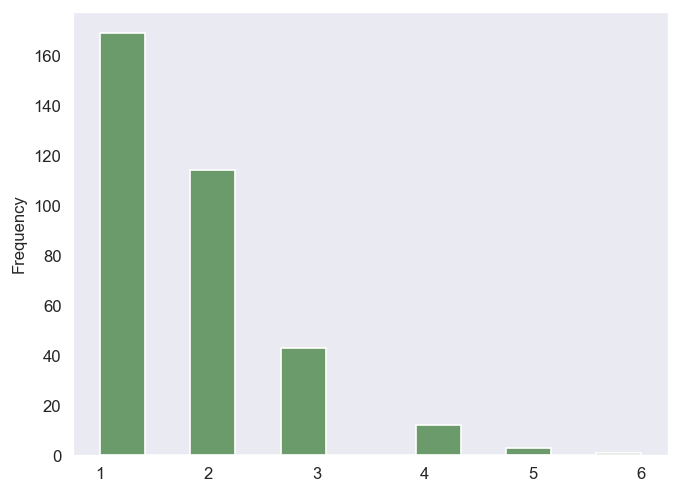

In [107]:
df_2.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])

### Segregación por tipo de carrera

In [108]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)
df_2['tipo_career'] = df_2.career.apply(clasificador)

### Proporción de alumnos por tipo de carrera y género

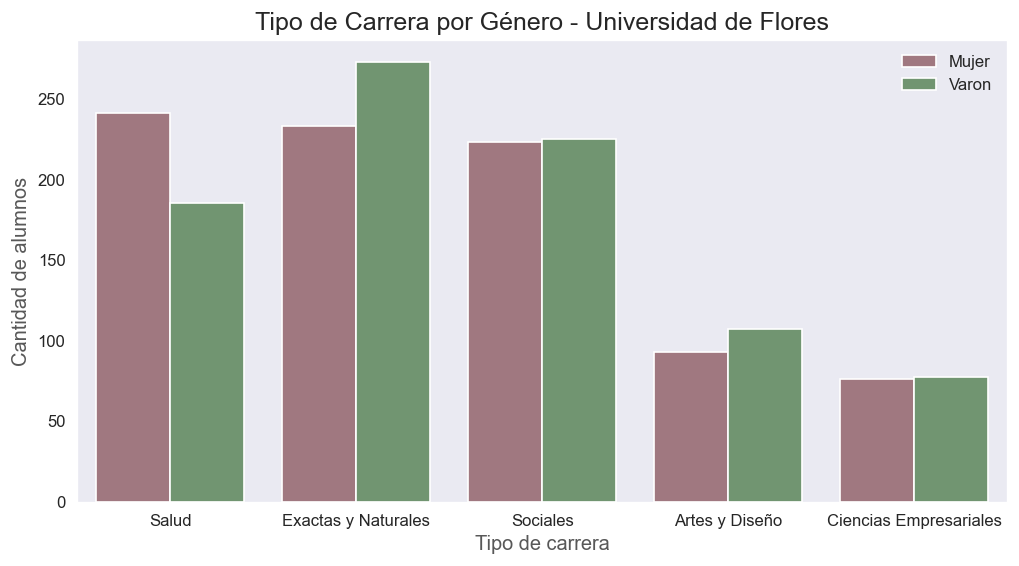

In [121]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])
plt.show()

**En la Universidad de Flores hay una gran paridad en cuanto a genero refiere. Las disparidades mas destacables son las de Salud donde predominan mujeres, y las de ciencias exactas y naturales donde predominan los hombres.**

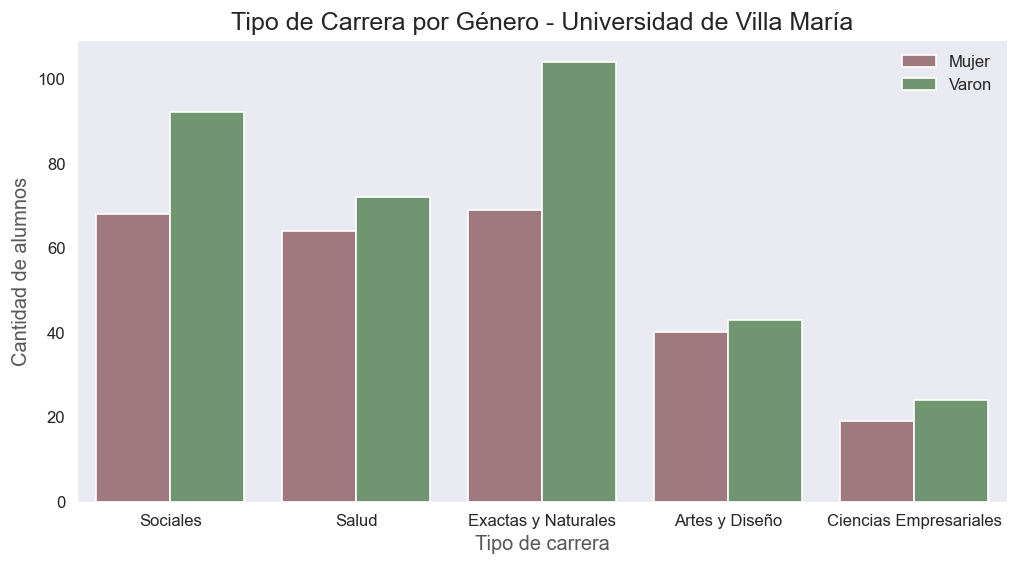

In [110]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

**Aqui podemos ver en profundidad la amplia disparidad entre hombres y mujeres que hay en Villa María, habiendo un porcentaje mas alto de hombres que de mujeres en todos los tipos de carreras de la universidad**

### Top Carreras por Proporción de Alumnas - Universidad de Flores

In [111]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.head()

gender,female,male
career,,
ciencias veterinarias,0.654545,0.345455
licenciatura en kinesiología y fisiatría,0.653061,0.346939
licenciatura en ciencias antropológicas,0.634615,0.365385
licenciatura en ciencia y tecnología de alimentos,0.596774,0.403226
ingeniería en informática,0.580645,0.419355


**Las mayoría de las carreras que más proporción tiene de mujeres corresponde a carreras relacionadas a la salud y la disparidad es mayor al 15% en algunos casos.**

In [112]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.tail()

gender,female,male
career,,
licenciatura en producción de bioimagenes,0.433962,0.566038
licenciatura en planificación y diseño del paisaje,0.409091,0.590909
diseño de imagen y sonido,0.389831,0.610169
ingeniería mecánica,0.325581,0.674419
ingeniería electrónica,0.313433,0.686567


### Top Carreras por Proporción de Alumnas - Universidad de Villa Maria

In [113]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.head()

gender,female,male
career,,
ingeniería en informática,0.894737,0.105263
licenciatura en kinesiología y fisiatría,0.785714,0.214286
licenciatura en terapia ocupacional,0.764706,0.235294
agronomía,0.736842,0.263158
licenciatura en ciencias de la computación,0.700000,0.300000


In [114]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.tail()

gender,female,male
career,,
licenciatura en relaciones del trabajo,0.400000,0.600000
medicina,0.400000,0.600000
ciencias veterinarias,0.388889,0.611111
licenciatura en ciencias antropológicas,0.375000,0.625000
licenciatura en producción de bioimagenes,0.263158,0.736842


### Algunos ejemplos

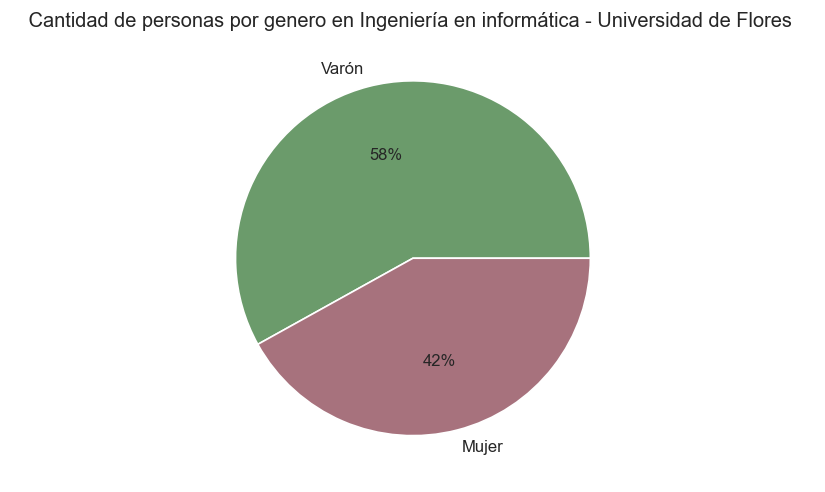

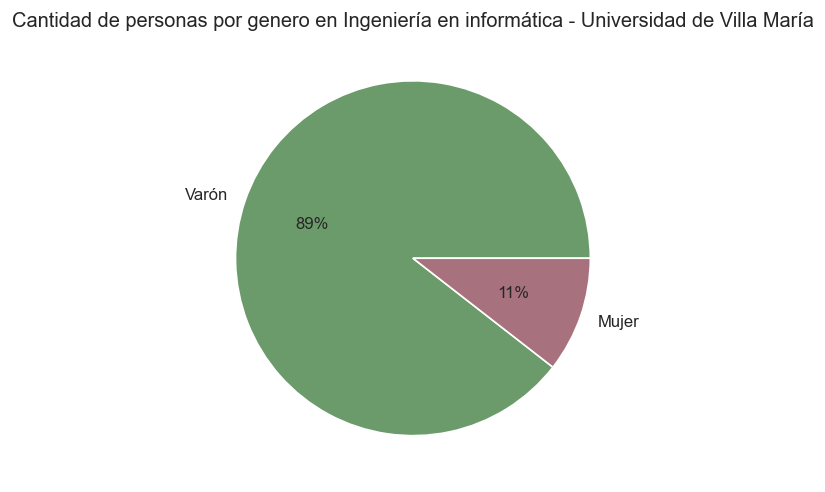

In [115]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


La carrera de informática suele tener el prejuicio de ser una carrera propia de varones, como lo vemos claramente en la universidad de Villa Maria donde tan **solo un 11% del alumnado es de sexo femenino**. 
Sin embargo en la universidad de Flores hay una gran paridad siendo que el 42% del alumnado es femenino.

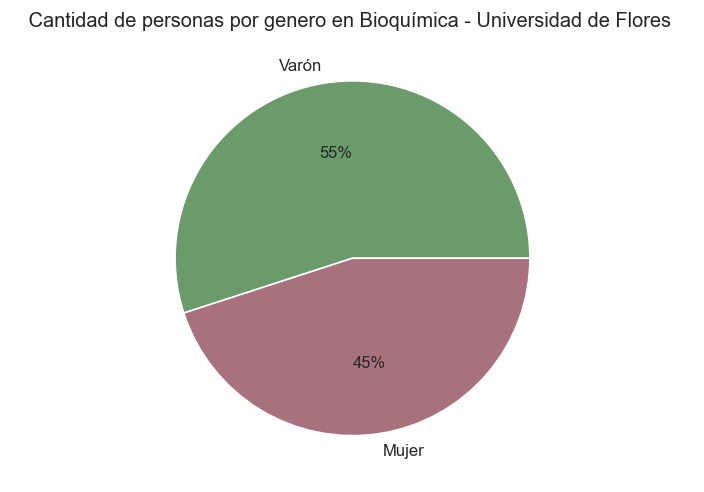

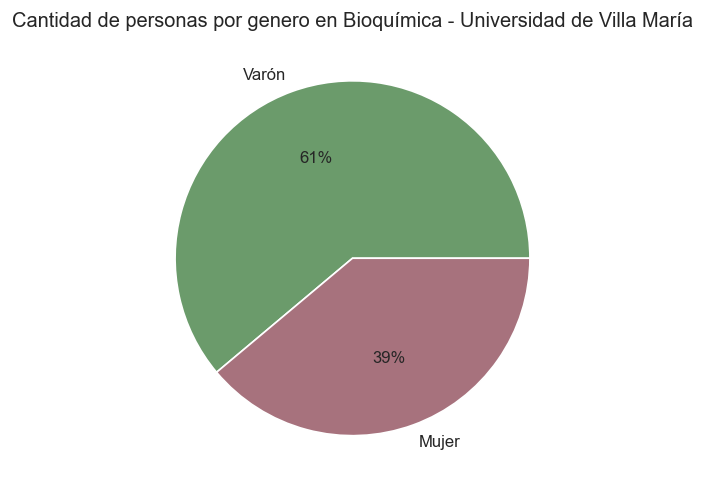

In [116]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

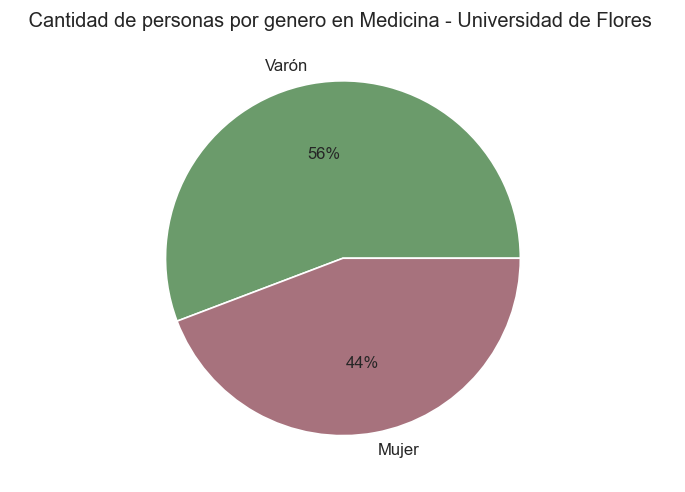

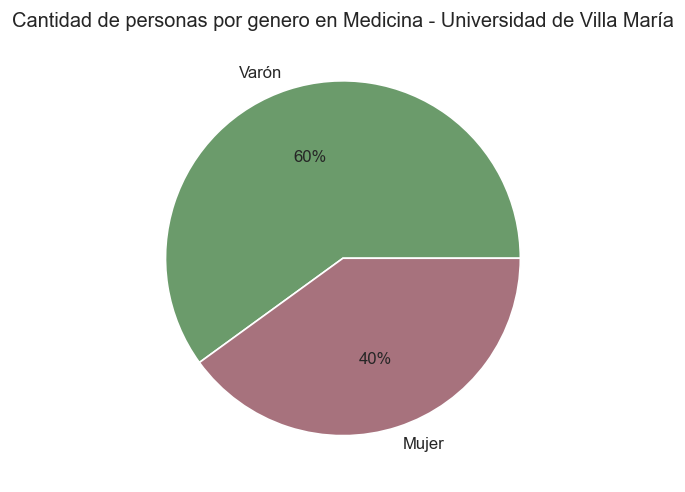

In [117]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

Tanto en Bioquímica como en Medicina, dos carreras que suelen tener el prejuicio de tener más mujeres en ambas carreras para ambas universidades muestran una prevalencia de varones.

## Inscriptos  por universidad

In [122]:
print(f'Numero de inscriptos en la {university1_name}: ', df_1.shape[0])
print(f'Numero de inscriptos en la {university2_name}: ', df_2.shape[0])

Numero de inscriptos en la Universidad de Flores:  1733
Numero de inscriptos en la Universidad de Villa María:  595


# Conclusiones

- El numero de inscriptos en la universidad de Flores es de 1733 mientras que en Villa María es de apenas 595.

- Ambas universidades tienen una distribución similar a una distribución Poisson, con un pico en los 20 años, con lo cuál el alumnado es esencialmente joven, con lo cuál podría incentivarse un aumento de alumnado de mayor edad creando carreras cortas y otorgando becas a personas mayores de 21 años.

- Ambas tienen cierta equidad a lo largo de sus carreras. Aunque se puede destacar que en la mayoria de carreras la cantidad de alumnos hombres es mayor a la del alumnado femenino.